In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df={"roll_no":["11","21","31","41","51","61","45","44","23","18"],"name":["a","b","c","d","e","f","g","h","i","j"],"SGPA1":[5.6,6.6,np.nan,7.6,8.4,7.2,8.9,9.2,9.3,8.5],"age":[180,19,20,18,19,20,18,19,2,20]}

In [3]:
data=pd.DataFrame(df)

In [4]:
data

,roll_no,name,SGPA1,age
0,11,a,5.6,180
1,21,b,6.6,19
2,31,c,NaN,20
3,41,d,7.6,18
4,51,e,8.4,19
5,61,f,7.2,20
6,45,g,8.9,18
7,44,h,9.2,19
8,23,i,9.3,2
9,18,j,8.5,20


In [5]:
data.isnull().sum()

roll_no    0
name       0
SGPA1      1
age        0
dtype: int64

In [6]:
data['SGPA1'].fillna(data['SGPA1'].mean(),inplace=True)

In [7]:
data.dtypes

roll_no     object
name        object
SGPA1      float64
age          int64
dtype: object

In [8]:
data

,roll_no,name,SGPA1,age
0,11,a,5.600000,180
1,21,b,6.600000,19
2,31,c,7.922222,20
3,41,d,7.600000,18
4,51,e,8.400000,19
5,61,f,7.200000,20
6,45,g,8.900000,18
7,44,h,9.200000,19
8,23,i,9.300000,2
9,18,j,8.500000,20


<Axes: ylabel='age'>

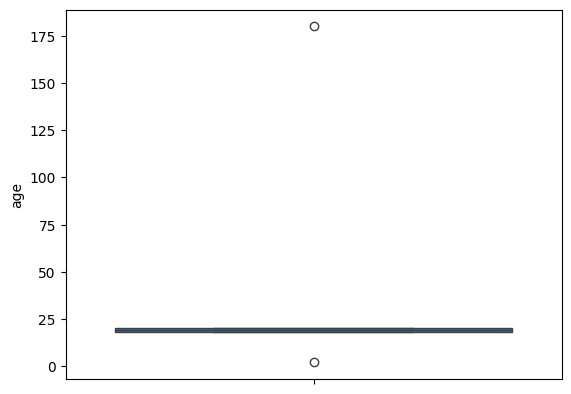

In [9]:
sns.boxplot(data['age'])

In [10]:
Q1=data['age'].quantile(0.25)
Q3=data['age'].quantile(0.75)

IQR=Q3-Q1

print("Q1: ", Q1)
print("Q3: ", Q3)
print("IQR: ", IQR)

Q1:  18.25
Q3:  20.0
IQR:  1.75


In [11]:
outliers=data[(data['age']<(Q1-1.5*IQR)) | (data['age']>(Q3+1.5*IQR))]
print(outliers)

  roll_no name  SGPA1  age
0      11    a    5.6  180
8      23    i    9.3    2


In [12]:
data['age']=data['age'].mask(data['age']>Q3+1.5*IQR,data['age'].mode()[0])


In [13]:
data['age']=data['age'].mask(data['age']<Q1-1.5*IQR,data['age'].mode()[0])

In [14]:
data

,roll_no,name,SGPA1,age
0,11,a,5.600000,19
1,21,b,6.600000,19
2,31,c,7.922222,20
3,41,d,7.600000,18
4,51,e,8.400000,19
5,61,f,7.200000,20
6,45,g,8.900000,18
7,44,h,9.200000,19
8,23,i,9.300000,19
9,18,j,8.500000,20


In [ ]:
# The age column has a centered data. We can apply a log transformation to the age column to 
# convert the distribution into a normal distribution.
# Log transformation is a statistical technique that replaces data values with logarithmic forms, such as ln(x) or log(x), to reduce skewness in a measurement variable.

In [15]:
data['age']=data['age'].apply(lambda x: np.log(x) if x > 0 else 0)

In [16]:
print(data['age'])

0    2.944439
1    2.944439
2    2.995732
3    2.890372
4    2.944439
5    2.995732
6    2.890372
7    2.944439
8    2.944439
9    2.995732
Name: age, dtype: float64


<Axes: ylabel='age'>

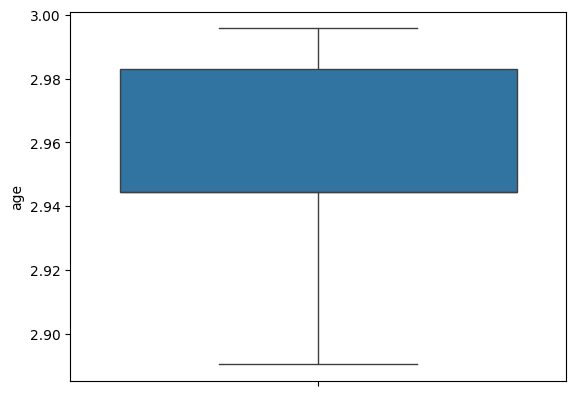

In [20]:
# show age distribution after transformation in boxplot
sns.boxplot(data['age'])


In [25]:
data['age'].mean()

2.9490135232286505